In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# 1. Tải dữ liệu
def load_data(file_path):
    df = pd.read_csv(file_path)
    print("10 dòng đầu tiên của dữ liệu:")
    print(df.head(10))
    return df

# Đường dẫn tệp
data_path = "titanic_disaster.csv"
df = load_data(data_path)

10 dòng đầu tiên của dữ liệu:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCar

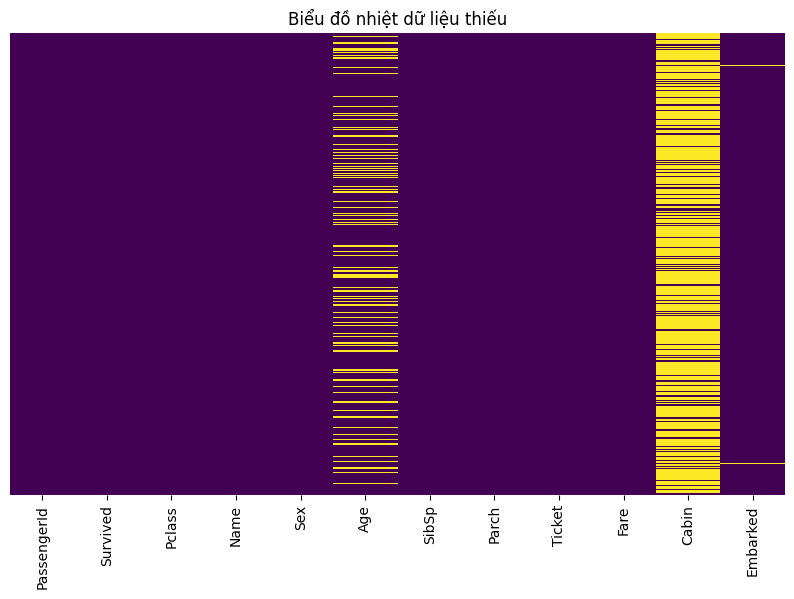

Dữ liệu thiếu:
Age         177
Cabin       687
Embarked      2
dtype: int64
- Cột Age có nhiều giá trị thiếu, cần điền vào bằng giá trị trung bình.
- Cột Cabin có rất nhiều giá trị thiếu, có thể thay thế bằng 'Unknown'.
- Cột Embarked có một số giá trị thiếu, có thể điền bằng giá trị phổ biến nhất.


In [3]:
# 2. Kiểm tra dữ liệu thiếu
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Biểu đồ nhiệt dữ liệu thiếu")
plt.show()

# Nhận xét về dữ liệu thiếu
missing_values = df.isnull().sum()
print("Dữ liệu thiếu:")
print(missing_values[missing_values > 0])
print("- Cột Age có nhiều giá trị thiếu, cần điền vào bằng giá trị trung bình.")
print("- Cột Cabin có rất nhiều giá trị thiếu, có thể thay thế bằng 'Unknown'.")
print("- Cột Embarked có một số giá trị thiếu, có thể điền bằng giá trị phổ biến nhất.")

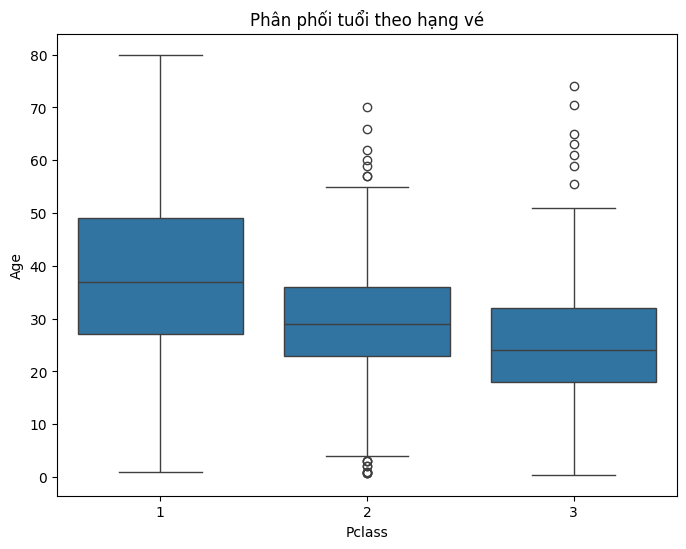

In [4]:
# 3. Tách cột Tên
df[['secondName', 'firstName']] = df['Name'].str.split(', ', expand=True)
df.drop(columns=['Name'], inplace=True)

# 4. Chuẩn hóa cột Giới tính
df['Sex'] = df['Sex'].replace({'male': 'M', 'female': 'F'})

# 5a. Trực quan hóa phân phối tuổi theo Pclass
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Phân phối tuổi theo hạng vé")
plt.show()

# 5b. Điền dữ liệu thiếu của Age theo Pclass
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

In [5]:
# 6. Phân loại nhóm tuổi
age_bins = [0, 12, 18, 60, float('inf')]
age_labels = ['Trẻ em', 'Thiếu niên', 'Người lớn', 'Người già']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

# 7. Trích xuất danh xưng từ firstName
df['namePrefix'] = df['firstName'].str.extract(r'(^\w+)\.')

# 8. Tính toán số lượng thành viên trong gia đình
df['familySize'] = 1 + df['SibSp'] + df['Parch']

# 9. Xác định hành khách đi một mình
df['Alone'] = (df['familySize'] == 1).astype(int)

# 10. Trích xuất loại cabin
df['typeCabin'] = df['Cabin'].astype(str).str[0]
df['typeCabin'] = df['typeCabin'].replace('n', 'Unknown')

# 11. Điền dữ liệu thiếu cho Embarked bằng giá trị phổ biến nhất
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(most_common_embarked)

# 12. Loại bỏ dữ liệu trùng lặp
df.drop_duplicates(subset=['PassengerId'], keep='first', inplace=True)

# Chia dữ liệu thành tập huấn luyện (80%) và kiểm tra (20%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


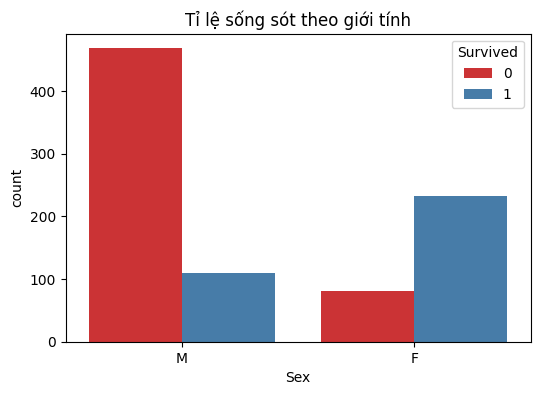

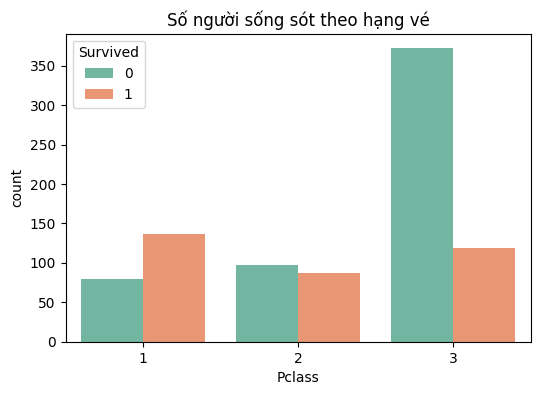

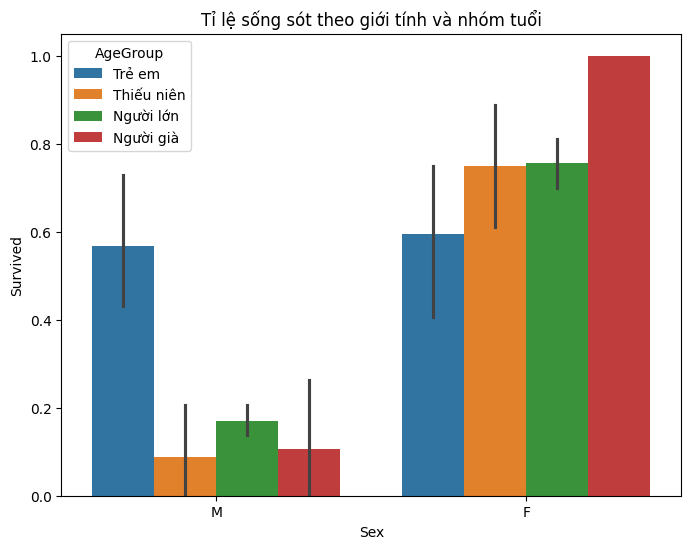

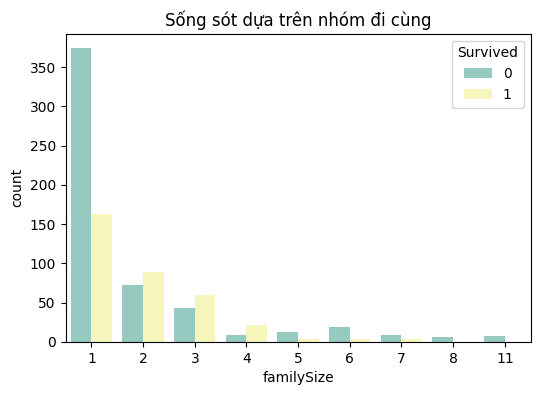

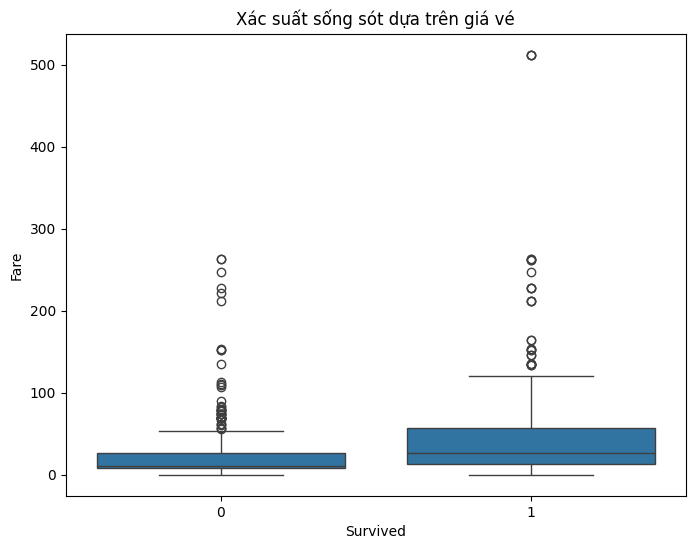

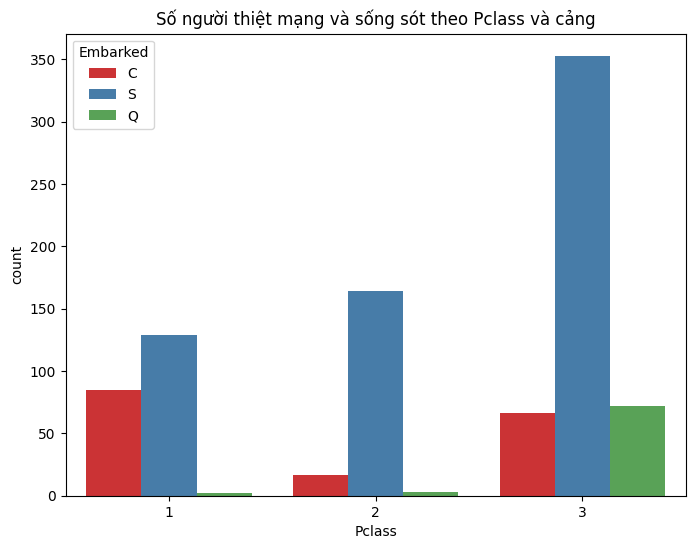

In [6]:
# 12. Trực quan tỉ lệ sống sót theo giới tính
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title("Tỉ lệ sống sót theo giới tính")
plt.show()
# Nhận xét: Nữ có tỷ lệ sống sót cao hơn nam đáng kể.

# 13. Trực quan số người sống sót theo Pclass
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title("Số người sống sót theo hạng vé")
plt.show()
# Nhận xét: Hành khách hạng nhất có tỷ lệ sống sót cao hơn hạng 3.

# 14. Trực quan số người sống sót theo giới tính và nhóm tuổi
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', hue='AgeGroup', data=df)
plt.title("Tỉ lệ sống sót theo giới tính và nhóm tuổi")
plt.show()
# Nhận xét: Trẻ em có tỷ lệ sống sót cao hơn các nhóm khác.

# 15. Trực quan xác suất sống sót dựa trên nhóm đi cùng
plt.figure(figsize=(6, 4))
sns.countplot(x='familySize', hue='Survived', data=df, palette='Set3')
plt.title("Sống sót dựa trên nhóm đi cùng")
plt.show()
# Nhận xét: Người có gia đình đi cùng có tỷ lệ sống sót cao hơn.

# 16. Trực quan xác suất sống sót dựa trên giá vé
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Xác suất sống sót dựa trên giá vé")
plt.show()
# Nhận xét: Giá vé cao có liên quan đến tỷ lệ sống sót cao hơn.

# 17. Trực quan số người thiệt mạng và sống sót theo Pclass và cảng
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Embarked', data=df, palette='Set1')
plt.title("Số người thiệt mạng và sống sót theo Pclass và cảng")
plt.show()
# Nhận xét: Cảng lên tàu có thể ảnh hưởng đến tỷ lệ sống sót của hành khách.